In [276]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [277]:
df=pd.read_excel('bands.xlsx')

In [278]:
df.head()

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [279]:
df.shape

(541, 40)

In [280]:
df.dtypes

timestamp               object
cylinder number         object
customer                object
job number              object
grain screened          object
ink color               object
proof on ctd ink        object
blade mfg               object
cylinder division       object
paper type              object
ink type                object
direct steam            object
solvent type            object
type on cylinder        object
press type              object
press                   object
unit number            float64
cylinder size           object
paper mill location     object
plating tank            object
proof cut               object
viscosity               object
caliper                 object
ink temperature         object
humifity                object
roughness               object
blade pressure          object
varnish pct             object
press speed             object
ink pct                 object
solvent pct             object
ESA Voltage             object
ESA Ampe

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            541 non-null    object 
 1   cylinder number      541 non-null    object 
 2   customer             541 non-null    object 
 3   job number           541 non-null    object 
 4   grain screened       541 non-null    object 
 5   ink color            541 non-null    object 
 6   proof on ctd ink     541 non-null    object 
 7   blade mfg            541 non-null    object 
 8   cylinder division    541 non-null    object 
 9   paper type           541 non-null    object 
 10  ink type             541 non-null    object 
 11  direct steam         541 non-null    object 
 12  solvent type         541 non-null    object 
 13  type on cylinder     541 non-null    object 
 14  press type           541 non-null    object 
 15  press                541 non-null    obj

In [282]:
df['year']=df['timestamp'].astype(str).str[0:4]

In [283]:
df['month']=df['timestamp'].astype(str).str[4:6]

In [284]:
df=df.drop('timestamp', axis=1)

In [285]:
df.head()

,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,...,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type,year,month
0,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,...,0,2.5,1,34,40,105,100,band,1991,01
1,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,...,0,2.5,0.7,34,40,105,100,noband,1991,01
2,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,...,0,2.8,0.9,40,40,103.87,100,noband,1991,01
3,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,...,0,2.5,1.3,40,40,108.06,100,noband,1991,01
4,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,...,0,2.3,0.6,35,40,106.67,100,noband,1991,01


In [286]:
df.nunique()

cylinder number        435
customer                84
job number             263
grain screened           4
ink color                4
proof on ctd ink         4
blade mfg                4
cylinder division        3
paper type               6
ink type                 7
direct steam             5
solvent type             4
type on cylinder         5
press type               5
press                    9
unit number              8
cylinder size            8
paper mill location      7
plating tank             4
proof cut               29
viscosity               39
caliper                 19
ink temperature         66
humifity                43
roughness               19
blade pressure          37
varnish pct            123
press speed             83
ink pct                 82
solvent pct            116
ESA Voltage             18
ESA Amperage             5
wax                     31
hardener                30
roller durometer        13
current density          8
anode space ratio       81
c

In [287]:
df.columns

Index(['cylinder number', 'customer', 'job number', 'grain screened',
       'ink color', 'proof on ctd ink', 'blade mfg', 'cylinder division',
       'paper type', 'ink type', 'direct steam', 'solvent type',
       'type on cylinder', 'press type', 'press', 'unit number',
       'cylinder size', 'paper mill location', 'plating tank', 'proof cut',
       'viscosity', 'caliper', 'ink temperature', 'humifity', 'roughness',
       'blade pressure', 'varnish pct', 'press speed', 'ink pct',
       'solvent pct', 'ESA Voltage', 'ESA Amperage', 'wax', 'hardener',
       'roller durometer', 'current density', 'anode space ratio',
       'chrome content', 'band type', 'year', 'month'],
      dtype='object')

In [288]:
df.isnull().sum()

cylinder number        0
customer               0
job number             0
grain screened         0
ink color              0
proof on ctd ink       0
blade mfg              0
cylinder division      0
paper type             0
ink type               0
direct steam           0
solvent type           0
type on cylinder       0
press type             0
press                  0
unit number            0
cylinder size          1
paper mill location    1
plating tank           1
proof cut              1
viscosity              1
caliper                1
ink temperature        2
humifity               2
roughness              2
blade pressure         2
varnish pct            2
press speed            2
ink pct                2
solvent pct            2
ESA Voltage            2
ESA Amperage           2
wax                    2
hardener               2
roller durometer       2
current density        2
anode space ratio      2
chrome content         2
band type              2
year                   0


In [289]:
df.describe()

,unit number
count,541.000000
mean,4.871534
std,3.251017
min,1.000000
25%,2.000000
50%,2.000000
75%,9.000000
max,10.000000


In [290]:
df.index

RangeIndex(start=0, stop=541, step=1)

In [291]:
df.sort_index(axis=1, ascending=False, inplace=True)
df

,year,wax,viscosity,varnish pct,unit number,type on cylinder,solvent type,solvent pct,roughness,roller durometer,...,customer,current density,chrome content,caliper,blade pressure,blade mfg,band type,anode space ratio,ESA Voltage,ESA Amperage
0,1991,2.5,46,13.1,2.0,YES,LINE,36.4,0.75,34,...,TVGUIDE,40,100,0.2,20,BENTON,band,105,0,0
1,1991,2.5,46,6.6,2.0,YES,LINE,38.5,0.75,34,...,TVGUIDE,40,100,0.3,20,BENTON,noband,105,0,0
2,1991,2.8,40,6.5,9.0,YES,LINE,39.8,?,40,...,MODMAT,40,100,0.433,30,BENTON,noband,103.87,0,0
3,1991,2.5,40,5.6,9.0,YES,LINE,38.8,0.3125,40,...,MASSEY,40,100,0.3,30,BENTON,noband,108.06,0,0
4,1991,2.3,46,0,2.0,YES,LINE,42.5,0.75,35,...,KMART,40,100,0.3,30,BENTON,noband,106.67,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1994,1,52,?,9.0,?,?,?,1,?,...,kmart,40,100,?,25,?,band,112.5,?,?
537,1994,0,?,?,1.0,yes,?,?,0.5,?,...,best,40,100,0.2,34,?,band,110,?,?
538,1994,2.7,?,?,2.0,?,?,?,1,?,...,kmart,40,100,0.3,34,?,band,108,?,?
539,1994,1.5,46,?,2.0,?,?,?,1,?,...,kmart,40,100,0.267,34,?,band,108,?,?


In [292]:
df.replace('?',np.nan,inplace=True)

In [293]:
df['grain screened'].unique()

array(['YES', 'NO', nan, 45], dtype=object)

In [294]:
df['grain screened'].replace('YES',0,inplace=True)
df['grain screened'].replace('NO',1,inplace=True)
df['grain screened'].replace(45,2,inplace=True)
df=df[df['grain screened'].notna()]
df['grain screened']=df['grain screened'].astype(int)
df['grain screened'].unique()

array([0, 1, 2])

In [295]:
df['ink color'].unique()

array(['KEY', 'KeY', 0.2], dtype=object)

In [296]:
df['ink color'].replace('KEY',1,inplace=True)
df['ink color'].replace('KeY',2,inplace=True)
#df['ink color'].replace('key',3,inplace=True)
df['ink color'].replace(0.2,0,inplace=True)
df['ink color']=df['ink color'].astype(int)
df['ink color'].unique()

array([1, 2, 0])

In [297]:
df['proof on ctd ink'].unique()

array(['YES', 'NO', nan, 17], dtype=object)

In [298]:
df['proof on ctd ink'].replace('YES',0,inplace=True)
df['proof on ctd ink'].replace('NO',1,inplace=True)
df['proof on ctd ink'].replace(17,2,inplace=True)
df=df[df['proof on ctd ink'].notna()]
df['proof on ctd ink']=df['proof on ctd ink'].astype(int)
df['proof on ctd ink'].unique()

array([0, 1, 2])

In [299]:
df['blade mfg'].unique()

array(['BENTON', nan, 'UDDEHOLM', 84], dtype=object)

In [300]:
df['blade mfg'].replace('BENTON',0,inplace=True)
df['blade mfg'].replace('UDDEHOLM',1,inplace=True)
df['blade mfg'].replace(84,2,inplace=True)
df=df[df['blade mfg'].notna()]

In [301]:
df['blade mfg']=df['blade mfg'].astype(int)
df['blade mfg'].unique()

array([0, 1, 2])

In [302]:
df['cylinder division'].unique()

array(['GALLATIN', 0.8125], dtype=object)

In [303]:
df['cylinder division'].replace('GALLATIN',1,inplace=True)
df['cylinder division'].replace(0.8125,0,inplace=True)
df['cylinder division']=df['cylinder division'].astype(int)
df['cylinder division'].unique()

array([1, 0])

In [304]:
df['paper type'].unique()

array(['UNCOATED', 'COATED', 27], dtype=object)

In [305]:
df['paper type'].replace('UNCOATED',0,inplace=True)
df['paper type'].replace('COATED',1,inplace=True)
df['paper type'].replace(27,2,inplace=True)
df['paper type']=df['paper type'].astype(int)
df['paper type'].unique()

array([0, 1, 2])

In [306]:
df['ink type'].unique()

array(['UNCOATED', 'COATED', 'COVER', nan], dtype=object)

In [307]:
df['ink type'].replace('UNCOATED',0,inplace=True)
df['ink type'].replace('COATED',1,inplace=True)
df['ink type'].replace('COVER',2,inplace=True)
df=df[df['ink type'].notna()]
df['ink type']=df['ink type'].astype(int)
df['ink type'].unique()

array([0, 1, 2])

In [308]:
df['direct steam'].unique()

array(['NO', 'YES'], dtype=object)

In [309]:
df['direct steam'].replace('NO',0,inplace=True)
df['direct steam'].replace('YES',1,inplace=True)
df['direct steam']=df['direct steam'].astype(int)
df['direct steam'].unique()

array([0, 1])

In [310]:
df['solvent type'].unique()

array(['LINE', 'XYLOL', 'NAPTHA'], dtype=object)

In [311]:
df['solvent type'].replace('LINE',0,inplace=True)
df['solvent type'].replace('XYLOL',1,inplace=True)
df['solvent type'].replace('NAPTHA',2,inplace=True)
df['solvent type']=df['solvent type'].astype(int)
df['solvent type'].unique()

array([0, 1, 2])

In [312]:
df['type on cylinder'].unique()

array(['YES', 'NO', nan], dtype=object)

In [313]:
df['type on cylinder'].replace('YES',0,inplace=True)
df['type on cylinder'].replace('NO',1,inplace=True)
df=df[df['type on cylinder'].notna()]
df['type on cylinder']=df['type on cylinder'].astype(int)
df['type on cylinder'].unique()

array([0, 1])

In [314]:
df['press type'].unique()

array(['Motter94', 'WoodHoe70', 'Albert70', 'Motter70'], dtype=object)

In [315]:
df['press type'].replace('Motter94',0,inplace=True)
df['press type'].replace('WoodHoe70',1,inplace=True)
df['press type'].replace('Albert70',2,inplace=True)
df['press type'].replace('Motter70',3,inplace=True)
df['press type']=df['press type'].astype(int)
df['press type'].unique()

array([0, 1, 2, 3])

In [316]:
df['press'].unique()

array([821., 815., 816., 827., 802., 813., 824., 828.])

In [317]:
df['unit number'].unique()

array([ 2.,  9.,  7.,  5.,  1., 10.,  6.])

In [318]:
df['unit number']=df['unit number'].astype(int)
df['unit number'].unique()

array([ 2,  9,  7,  5,  1, 10,  6])

In [319]:
df['cylinder size'].unique()

array(['TABLOID', 'CATALOG', 'SPIEGEL'], dtype=object)

In [320]:
df['cylinder size'].replace(0.7,0,inplace=True)
df['cylinder size'].replace('TABLOID',1,inplace=True)
df['cylinder size'].replace('CATALOG',2,inplace=True)
df['cylinder size'].replace('SPIEGEL',3,inplace=True)
df['cylinder size']=df['cylinder size'].astype(int)
df['cylinder size'].unique()

array([1, 2, 3])

In [321]:
df['paper mill location'].unique()

array(['NorthUS', nan, 'CANADIAN', 'CANAdiAN', 'SCANDANAVIAN', 'SouthUS',
       'mideuropean'], dtype=object)

In [322]:
df['paper mill location'].replace('NorthUS',0,inplace=True)
df['paper mill location'].replace('CANADIAN',1,inplace=True)
df['paper mill location'].replace('CANAdiAN',1,inplace=True)
df['paper mill location'].replace('SCANDANAVIAN',2,inplace=True)
df['paper mill location'].replace('SouthUS',3,inplace=True)
df['paper mill location'].replace('mideuropean',4,inplace=True)
df=df[df['paper mill location'].notna()]
df['paper mill location']=df['paper mill location'].astype(int)
df['paper mill location'].unique()

array([0, 1, 2, 3, 4])

In [323]:
df['plating tank'].unique()

array([1911.,   nan, 1910.])

In [324]:
#df=df.fillna({'plating tank':np.mean(df['plating tank'])})
#df['plating tank']=round(df['plating tank'],2)
df['plating tank']=df['plating tank'].fillna(method='bfill')
df['plating tank'].unique()

array([1911., 1910.])

In [325]:
df['ESA Amperage'].unique()

array([0. , 0.5, 4. , 6. ])

In [326]:
df['roller durometer'].unique()

array([34. , 40. , 30. , 38. , 33. , 32. , 35. , 28. , 50. , 45. , 60. ,
       38.5])

In [327]:
df=df.fillna({'roller durometer':np.mean(df['roller durometer'])})
df['roller durometer'].unique()

array([34. , 40. , 30. , 38. , 33. , 32. , 35. , 28. , 50. , 45. , 60. ,
       38.5])

In [328]:
df['current density'].unique()

array([40., 33., 35., 30., nan, 37., 45.])

In [329]:
df['current density']=df['current density'].fillna(method='bfill')
df['current density'].unique()

array([40., 33., 35., 30., 37., 45.])

In [330]:
df['chrome content'].unique()

array([100.,  90.,  nan])

In [331]:
df['chrome content']=df['chrome content'].fillna(method='bfill')
df['chrome content'].unique()

array([100.,  90.])

In [332]:
df['band type'].unique()

array(['band', 'noband'], dtype=object)

In [333]:
df['band type'].replace('band',0,inplace=True)
df['band type'].replace('noband',1,inplace=True)
df['band type'].unique()

array([0, 1], dtype=int64)

In [334]:
df['year']=df['year'].astype(int)
df['year'].unique()

array([1991, 1990])

In [335]:
df['month']=df['month'].astype(int)
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [336]:
df=df.fillna({'roughness':np.mean(df['roughness'])})
df['roughness'].unique()

array([0.75      , 0.74160819, 0.3125    , 0.4375    , 1.        ,
       0.625     , 0.8125    , 0.875     , 0.5       , 0.5625    ,
       0.9375    , 1.25      , 1.125     , 0.25      , 0.375     ,
       0.8175    ])

In [337]:
df=df.fillna({'anode space ratio':np.mean(df['anode space ratio'])})
df['anode space ratio'].unique()

array([105.        , 103.87      , 108.06      , 106.67      ,
       103.22      , 106.66      , 106.6       , 100.        ,
       107.4       ,  96.875     , 106.45      , 103.12      ,
        96.97      , 103.125     ,  94.117     , 109.67      ,
       110.        , 106.89      , 103.33      ,  96.7       ,
       103.3       ,  96.9       ,  96.6       , 103.2       ,
        96.8       , 102.85546518,  90.        ,  93.5       ,
        93.75      , 105.2       , 111.1       ,  93.3       ,
       105.1       , 106.7       , 106.9       ,  93.6       ,
       106.25      ,  90.3       ,  93.55      , 114.3       ,
       114.29      , 110.7       ,  98.3       ,  96.77      ,
       101.67      , 110.71      , 117.85      , 114.28      ])

In [338]:
df=df.fillna({'hardener':np.mean(df['hardener'])})
df['hardener']=round(df['hardener'],2)
df['hardener'].unique()

array([1.  , 0.7 , 0.9 , 1.3 , 0.8 , 0.6 , 1.1 , 1.8 , 1.4 , 1.5 , 1.7 ,
       0.85, 0.75, 0.  , 0.2 , 1.2 , 2.  , 0.5 , 0.96, 1.25, 1.35, 0.4 ,
       0.3 , 2.3 , 3.  ])

In [339]:
df=df.fillna({'wax':np.mean(df['wax'])})
df['wax']=round(df['wax'],2)
df['wax'].unique()

array([2.5 , 2.8 , 3.  , 2.  , 1.1 , 1.7 , 1.  , 2.3 , 2.4 , 2.7 , 1.5 ,
       1.4 , 1.8 , 2.6 , 0.8 , 2.2 , 0.  , 2.1 , 2.44, 2.9 , 2.75, 2.85,
       1.3 , 3.1 , 1.2 , 2.25, 1.75, 1.9 ])

In [340]:
df=df.fillna({'ESA Voltage':np.mean(df['ESA Voltage'])})
df['ESA Voltage']=round(df['ESA Voltage'],2)
df['ESA Voltage'].unique()

array([ 0.  ,  5.  ,  6.  ,  1.5 ,  4.  , 12.  ,  2.  , 16.  ,  1.  ,
        8.  ,  3.  , 10.  ,  1.34,  0.75,  0.5 ,  9.  ,  4.5 ])

In [341]:
df['solvent pct'].unique()

array([36.4 , 38.5 , 39.8 , 38.8 , 37.6 , 37.5 , 31.8 , 35.9 , 36.8 ,
       40.  , 40.5 , 34.7 , 35.3 , 34.1 , 37.1 , 41.2 , 40.7 , 34.5 ,
       35.  , 34.8 , 34.9 , 38.  , 38.3 , 44.4 , 36.  , 42.5 , 36.6 ,
       35.4 , 36.5 , 36.3 , 39.2 , 39.4 , 40.2 , 38.9 , 36.1 , 37.2 ,
       42.2 , 34.6 , 46.8 , 34.3 , 40.4 , 41.6 , 39.3 , 41.7 , 35.7 ,
       32.7 , 43.8 , 23.1 , 31.3 , 35.2 , 38.2 , 36.9 , 28.6 , 47.9 ,
       39.1 , 33.3 , 47.4 , 42.1 , 36.7 , 37.8 , 34.  , 45.7 , 45.2 ,
       37.9 , 38.1 , 35.1 , 41.1 , 42.6 , 33.9 , 44.5 , 37.  , 37.3 ,
       22.5 , 35.5 , 32.8 , 38.7 , 42.9 , 39.  , 39.7 , 31.7 , 41.5 ,
       44.6 , 33.4 , 41.8 , 32.6 , 39.6 , 40.9 , 38.4 , 34.44, 40.6 ,
       32.  , 36.2 , 33.8 , 32.1 , 30.  , 41.9 , 45.9 , 44.3 , 35.8 ,
       46.1 , 27.5 , 43.2 , 39.5 , 53.4 ])

In [342]:
df['ink pct'].unique()

array([50.5 , 54.9 , 53.8 , 55.6 , 62.5 , 60.2 , 45.5 , 48.5 , 52.6 ,
       50.  , 59.5 , 49.5 , 58.8 , 56.2 , 58.1 , 57.5 , 45.  , 43.5 ,
       54.3 , 61.7 , 61.  , 51.5 , 52.1 , 49.  , 53.2 , 56.8 , 44.6 ,
       60.  , 51.  , 46.7 , 64.1 , 76.9 , 47.6 , 71.4 , 46.3 , 63.3 ,
       62.2 , 55.5 , 41.3 , 47.2 , 65.2 , 44.2 , 59.8 , 59.3 , 56.7 ,
       57.4 , 42.7 , 41.7 , 61.1 , 56.1 , 45.4 , 52.7 , 41.  , 42.  ,
       42.4 , 58.5 , 48.1 , 45.8 , 52.2 , 66.7 , 57.7 , 48.7 , 45.9 ,
       58.3 , 55.  , 50.6 , 53.4 , 68.  , 46.5 , 53.9 , 58.9 , 63.9 ,
       56.25, 58.  ])

In [343]:
df['press speed'].unique()

array([1700., 1900., 1850., 1467., 2600., 1650., 1750., 1600., 1500.,
       1400., 2400., 2200., 2000., 2100., 2150., 2050., 1425., 2270.,
       1480., 1100., 1300., 2300., 1800., 1683., 1734.,   nan, 2380.,
       1550., 1975., 1760., 1635., 1420., 1736., 2250., 2550., 2426.,
       1742., 1530., 1835.,  900., 2220., 1720., 1950., 1200., 1250.,
       1450., 1660., 2350., 2500., 1875., 1673., 2225., 1391., 2290.,
       2180., 1726.,    0., 1386., 2189., 2125., 1350., 1000., 2398.,
       2233.])

In [344]:
df['press speed']=df['press speed'].fillna(method='bfill')
df['press speed'].unique()

array([1700., 1900., 1850., 1467., 2600., 1650., 1750., 1600., 1500.,
       1400., 2400., 2200., 2000., 2100., 2150., 2050., 1425., 2270.,
       1480., 1100., 1300., 2300., 1800., 1683., 1734., 2380., 1550.,
       1975., 1760., 1635., 1420., 1736., 2250., 2550., 2426., 1742.,
       1530., 1835.,  900., 2220., 1720., 1950., 1200., 1250., 1450.,
       1660., 2350., 2500., 1875., 1673., 2225., 1391., 2290., 2180.,
       1726.,    0., 1386., 2189., 2125., 1350., 1000., 2398., 2233.])

In [345]:
df['blade pressure']=df['blade pressure'].fillna(method='bfill')
df['blade pressure']=df['blade pressure'].astype(int)
df['blade pressure'].unique()

array([20, 30, 28, 60, 32, 40, 25, 35, 31, 34, 24, 16, 46, 50, 56, 42, 22,
       26, 38, 47, 29, 58, 21, 23, 27, 55, 33, 52, 70, 49, 45, 41, 36, 48,
       43])

In [346]:
df['humifity']=df['humifity'].astype(int)
df['humifity'].unique()

array([ 78,  80,  75,  76,  70,  68,  65,  64,  66,  72,  74,  90,  91,
        82,  85,  57,  58,  84,  62,  60,  77,  79,  63,  73, 100,  86,
        92,  69,  71,  94,  98,  88,  87,  89,  95, 105,  81,  96,  93,
       103,  67,  83])

In [347]:
df=df.fillna({'ink temperature':np.mean(df['ink temperature'])})
df['ink temperature']=round(df['ink temperature'],2)
df['ink temperature'].unique()

array([17.  , 15.  , 16.  , 16.8 , 16.5 , 12.  , 14.  , 14.5 , 15.5 ,
       16.4 , 16.3 , 15.8 , 15.2 , 15.4 , 16.6 , 13.  , 15.9 , 18.  ,
       14.6 , 24.5 , 14.43, 18.5 , 16.2 , 14.1 , 14.02, 15.3 , 15.1 ,
       16.1 , 14.7 , 13.34, 13.86, 15.6 , 13.6 , 14.2 , 15.7 , 14.9 ,
       13.4 , 15.59, 14.3 , 13.23, 14.42, 16.08, 13.5 , 13.8 , 14.8 ,
       13.1 , 17.5 , 17.2 , 20.  , 18.1 , 16.53, 12.7 , 13.3 , 22.2 ])

In [348]:
df['caliper']=df['caliper'].fillna(method='bfill')
df['caliper'].unique()

array([0.2  , 0.3  , 0.433, 0.267, 0.367, 0.333, 0.233, 0.4  , 0.35 ,
       0.283, 0.5  , 0.467, 0.167, 0.133])

In [349]:
df['viscosity']=df['viscosity'].astype(int)
df['viscosity'].unique()

array([46, 40, 45, 43, 50, 38, 41, 42, 44, 35, 47, 39, 37, 48, 68, 60, 55,
       52, 56, 57, 67, 63, 53, 49, 54, 64, 70, 62, 69, 66, 65, 58, 51, 59,
       61, 72])

In [350]:
df=df.fillna({'proof cut':np.mean(df['proof cut'])})
df['proof cut']=round(df['proof cut'],2)
df['proof cut'].unique()

array([55.  , 62.  , 52.  , 50.  , 65.  , 40.  , 30.  , 60.  , 45.  ,
       35.  , 37.5 , 32.5 , 52.5 , 25.  , 47.5 , 67.5 , 42.5 , 42.  ,
       47.  , 45.81, 57.5 , 72.5 , 55.5 , 62.5 , 70.  , 32.  ])

In [351]:
df['job number'].unique()

array([25503., 47201., 39039., 38039., 35751., 37000., 35539., 23052.,
       38064., 35521., 37571., 37340., 35816., 37352., 37080., 37157.,
       35811., 35334., 37869., 27490., 35752., 35794., 37441., 37354.,
       35335., 37335., 35870., 25509., 37386., 35457., 47202., 37163.,
       37355., 35753., 25513., 25515., 37081., 35534., 35754., 37572.,
       35814., 37822., 35458., 47203., 25520., 35982., 35872., 37168.,
       37333., 25517., 37994., 35871., 37169., 47169., 25519., 35460.,
       37365., 37338., 35758., 37305., 37177., 37501., 35759., 37579.,
       37502., 37938., 35528., 37199., 37003., 37990., 47204., 37505.,
       47103., 34402., 34545., 36053., 36859., 34683., 36648., 34664.,
       36858., 25416., 34546., 36054., 34752., 36928., 25424., 34093.,
       34547., 36894., 36057., 36024., 34397., 36846., 38025., 36911.,
       25427., 34367., 34583., 25428., 36784., 47104., 34714., 36644.,
       35683., 34685., 34894., 36066., 34896., 23050., 36882., 34493.,
      

In [352]:
df=df.drop('job number', axis=1)

In [353]:
df['cylinder number']=df['cylinder number'].astype(str)

In [354]:
cylindernum_= df['cylinder number']
cylindernum = cylindernum_.copy()
le = LabelEncoder()
le.fit(cylindernum)
cylindernum = le.transform(cylindernum)
df['cylinder number'] = cylindernum

In [355]:
df['cylinder number'].unique()

array([194, 225,   5, 160, 164, 221, 273, 125,  93,  95, 242, 260, 281,
       228,  30,  35, 159,  48, 277, 286, 206, 139,  16,  15,  12,   8,
       230, 232, 114, 111, 154, 109, 102, 100, 118, 231, 196, 234, 201,
         7,  10, 108, 258, 285, 192, 287, 148, 101, 103, 267,   6,  11,
        14, 274, 226,  37, 169,  18, 254,  54,  49,  56, 128, 207, 236,
       262, 292, 294, 188, 289, 240, 251, 266, 136,   0,  19, 158, 141,
        77,  44, 143, 263, 209, 123, 172, 129,   9,  63,  64, 243,  88,
       279, 271, 174,  25, 295, 214, 215, 202,  59,  50, 200, 193,  72,
       191, 282, 239, 189,  13,  17, 252, 248, 298, 290,  85, 205, 280,
        83, 284,  96, 146, 104, 161, 299, 224,   1, 124, 105, 244, 275,
        58,  31, 120,  94, 137, 113,  39,  51, 133,  69,  29,  70,  38,
       212, 171, 153, 144, 253, 140, 135, 166, 175, 176, 127,  57, 269,
       261, 130, 119, 199, 272,  52, 145, 149, 257, 255, 293, 297,  66,
        65, 270,   4,  62,  91,  24, 162,  61, 296,  98, 112, 19

In [356]:
customer_= df['customer']
customer = customer_.copy()
le = LabelEncoder()
le.fit(customer)
customer = le.transform(customer)
df['customer'] = customer

In [357]:
df['customer'].unique()

array([50, 40, 39, 44, 12, 29, 28, 24, 31, 51, 14, 53, 48, 36, 54,  2,  5,
       45,  1, 35, 11,  4, 49, 19, 15,  6, 25, 47, 26,  3, 41, 33,  8, 21,
       32, 42, 13, 17, 22, 10, 23, 55, 30, 43, 20, 52, 18, 37, 16,  9,  7,
       46, 34, 38,  0, 27])

In [358]:
df.dtypes

year                     int32
wax                    float64
viscosity                int32
varnish pct            float64
unit number              int32
type on cylinder         int32
solvent type             int32
solvent pct            float64
roughness              float64
roller durometer       float64
proof on ctd ink         int32
proof cut              float64
press type               int32
press speed            float64
press                  float64
plating tank           float64
paper type               int32
paper mill location      int32
month                    int32
ink type                 int32
ink temperature        float64
ink pct                float64
ink color                int32
humifity                 int32
hardener               float64
grain screened           int32
direct steam             int32
cylinder size            int32
cylinder number          int32
cylinder division        int32
customer                 int32
current density        float64
chrome c

In [359]:
df.shape

(362, 40)

In [360]:
df

,year,wax,viscosity,varnish pct,unit number,type on cylinder,solvent type,solvent pct,roughness,roller durometer,...,customer,current density,chrome content,caliper,blade pressure,blade mfg,band type,anode space ratio,ESA Voltage,ESA Amperage
0,1991,2.5,46,13.1,2,0,0,36.4,0.750000,34.0,...,50,40.0,100.0,0.200,20,0,0,105.00,0.0,0.0
1,1991,2.5,46,6.6,2,0,0,38.5,0.750000,34.0,...,50,40.0,100.0,0.300,20,0,1,105.00,0.0,0.0
2,1991,2.8,40,6.5,9,0,0,39.8,0.741608,40.0,...,40,40.0,100.0,0.433,30,0,1,103.87,0.0,0.0
3,1991,2.5,40,5.6,9,0,0,38.8,0.312500,40.0,...,39,40.0,100.0,0.300,30,0,1,108.06,0.0,0.0
5,1991,2.5,40,8.6,2,0,0,37.6,0.437500,40.0,...,39,40.0,100.0,0.267,28,0,1,103.87,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1990,2.5,41,0.0,2,0,0,37.5,1.000000,30.0,...,20,40.0,100.0,0.200,30,0,1,106.45,1.0,0.0
426,1990,2.5,41,0.0,9,0,0,37.5,1.000000,30.0,...,20,40.0,100.0,0.200,43,0,1,106.45,1.0,0.0
427,1990,1.9,41,2.5,2,0,0,39.5,0.812500,30.0,...,20,40.0,100.0,0.333,30,0,1,114.28,4.5,0.0
428,1990,3.0,41,3.6,2,0,0,36.1,0.750000,40.0,...,17,40.0,100.0,0.267,28,0,1,117.85,4.0,0.0


In [361]:
df.isna().sum()

year                   0
wax                    0
viscosity              0
varnish pct            0
unit number            0
type on cylinder       0
solvent type           0
solvent pct            0
roughness              0
roller durometer       0
proof on ctd ink       0
proof cut              0
press type             0
press speed            0
press                  0
plating tank           0
paper type             0
paper mill location    0
month                  0
ink type               0
ink temperature        0
ink pct                0
ink color              0
humifity               0
hardener               0
grain screened         0
direct steam           0
cylinder size          0
cylinder number        0
cylinder division      0
customer               0
current density        0
chrome content         0
caliper                0
blade pressure         0
blade mfg              0
band type              0
anode space ratio      0
ESA Voltage            0
ESA Amperage           0


In [362]:
df.corr()

,year,wax,viscosity,varnish pct,unit number,type on cylinder,solvent type,solvent pct,roughness,roller durometer,...,customer,current density,chrome content,caliper,blade pressure,blade mfg,band type,anode space ratio,ESA Voltage,ESA Amperage
year,1.000000,-0.225225,0.023613,-0.072778,0.026728,-0.155583,-0.028250,-0.016639,0.115571,-0.095175,...,-0.024167,0.382956,0.181455,-0.092181,-0.154524,-0.043023,-0.016012,2.824798e-01,-0.005680,-0.081208
wax,-0.225225,1.000000,0.069781,0.195393,-0.002712,0.086486,-0.014792,-0.122817,-0.070982,0.245046,...,-0.085733,-0.105951,-0.030460,0.086961,0.218491,0.006611,-0.015217,-2.821071e-02,-0.090016,0.000306
viscosity,0.023613,0.069781,1.000000,-0.018292,0.001880,0.087737,-0.020346,-0.011126,0.010747,0.000792,...,0.081305,-0.152951,-0.016849,0.342694,0.096727,-0.001874,-0.134866,-2.546618e-02,-0.028881,0.011125
varnish pct,-0.072778,0.195393,-0.018292,1.000000,-0.011993,0.031258,0.045095,-0.499815,-0.017132,0.257327,...,0.039322,-0.109173,0.050188,0.064138,-0.032006,0.031821,0.000696,3.310148e-02,-0.097733,0.066883
unit number,0.026728,-0.002712,0.001880,-0.011993,1.000000,-0.051796,0.017213,0.044805,-0.002653,0.018711,...,0.018838,0.002049,0.115275,-0.009682,-0.043770,0.063940,0.077440,4.746088e-02,-0.033528,0.049790
type on cylinder,-0.155583,0.086486,0.087737,0.031258,-0.051796,1.000000,-0.060351,-0.123585,-0.032828,0.077264,...,-0.047805,-0.043996,-0.110476,-0.021268,0.106128,0.080185,-0.168809,-3.225309e-02,-0.107781,0.005392
solvent type,-0.028250,-0.014792,-0.020346,0.045095,0.017213,-0.060351,1.000000,0.014003,-0.053803,0.128320,...,-0.040488,-0.011816,0.045713,0.068398,0.086043,-0.010839,0.022336,1.548700e-02,-0.070752,0.085383
solvent pct,-0.016639,-0.122817,-0.011126,-0.499815,0.044805,-0.123585,0.014003,1.000000,-0.022433,-0.077144,...,-0.057053,-0.090706,0.159376,-0.037389,0.036028,-0.022374,0.153785,8.393669e-03,0.103918,-0.013998
roughness,0.115571,-0.070982,0.010747,-0.017132,-0.002653,-0.032828,-0.053803,-0.022433,1.000000,0.005590,...,-0.047751,-0.036395,0.012165,0.036859,-0.073235,-0.141927,0.032843,4.044904e-02,-0.050475,0.115459
roller durometer,-0.095175,0.245046,0.000792,0.257327,0.018711,0.077264,0.128320,-0.077144,0.005590,1.000000,...,-0.159012,-0.041652,0.099433,0.138792,0.282835,0.054227,-0.145894,-6.131955e-02,-0.137814,0.109763


In [363]:
df=df.drop('cylinder division',axis=1)
df.corr()

,year,wax,viscosity,varnish pct,unit number,type on cylinder,solvent type,solvent pct,roughness,roller durometer,...,customer,current density,chrome content,caliper,blade pressure,blade mfg,band type,anode space ratio,ESA Voltage,ESA Amperage
year,1.000000,-0.225225,0.023613,-0.072778,0.026728,-0.155583,-0.028250,-0.016639,0.115571,-0.095175,...,-0.024167,0.382956,0.181455,-0.092181,-0.154524,-0.043023,-0.016012,2.824798e-01,-0.005680,-0.081208
wax,-0.225225,1.000000,0.069781,0.195393,-0.002712,0.086486,-0.014792,-0.122817,-0.070982,0.245046,...,-0.085733,-0.105951,-0.030460,0.086961,0.218491,0.006611,-0.015217,-2.821071e-02,-0.090016,0.000306
viscosity,0.023613,0.069781,1.000000,-0.018292,0.001880,0.087737,-0.020346,-0.011126,0.010747,0.000792,...,0.081305,-0.152951,-0.016849,0.342694,0.096727,-0.001874,-0.134866,-2.546618e-02,-0.028881,0.011125
varnish pct,-0.072778,0.195393,-0.018292,1.000000,-0.011993,0.031258,0.045095,-0.499815,-0.017132,0.257327,...,0.039322,-0.109173,0.050188,0.064138,-0.032006,0.031821,0.000696,3.310148e-02,-0.097733,0.066883
unit number,0.026728,-0.002712,0.001880,-0.011993,1.000000,-0.051796,0.017213,0.044805,-0.002653,0.018711,...,0.018838,0.002049,0.115275,-0.009682,-0.043770,0.063940,0.077440,4.746088e-02,-0.033528,0.049790
type on cylinder,-0.155583,0.086486,0.087737,0.031258,-0.051796,1.000000,-0.060351,-0.123585,-0.032828,0.077264,...,-0.047805,-0.043996,-0.110476,-0.021268,0.106128,0.080185,-0.168809,-3.225309e-02,-0.107781,0.005392
solvent type,-0.028250,-0.014792,-0.020346,0.045095,0.017213,-0.060351,1.000000,0.014003,-0.053803,0.128320,...,-0.040488,-0.011816,0.045713,0.068398,0.086043,-0.010839,0.022336,1.548700e-02,-0.070752,0.085383
solvent pct,-0.016639,-0.122817,-0.011126,-0.499815,0.044805,-0.123585,0.014003,1.000000,-0.022433,-0.077144,...,-0.057053,-0.090706,0.159376,-0.037389,0.036028,-0.022374,0.153785,8.393669e-03,0.103918,-0.013998
roughness,0.115571,-0.070982,0.010747,-0.017132,-0.002653,-0.032828,-0.053803,-0.022433,1.000000,0.005590,...,-0.047751,-0.036395,0.012165,0.036859,-0.073235,-0.141927,0.032843,4.044904e-02,-0.050475,0.115459
roller durometer,-0.095175,0.245046,0.000792,0.257327,0.018711,0.077264,0.128320,-0.077144,0.005590,1.000000,...,-0.159012,-0.041652,0.099433,0.138792,0.282835,0.054227,-0.145894,-6.131955e-02,-0.137814,0.109763


In [382]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [379]:
X = df.drop('band type', axis = 1)
y = df['band type']

In [386]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)

In [387]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(289, 10) (73, 10) (289,) (73,)


In [388]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =-(cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))


LR    : 19.506603, 2.975812
Ridge    : 19.487731, 2.975922
svm    : 25.620051, 4.537775
GNB    : 17.672869, 2.452654
RF    : 20.390156, 4.829834
GB    : 23.714080, 3.187211


In [390]:
from sklearn import svm
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
clf = svm.SVC(kernel='rbf')
rfe = RFE(clf,n_features_to_select=10, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
clf.fit(X_train_rfe,y_train)
y_predict=clf.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.6885813148788927 
 MAE  =0.31141868512110726 
 confusion_matrix=
[[  0  90]
 [  0 199]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.69      1.00      0.82       199

    accuracy                           0.69       289
   macro avg       0.34      0.50      0.41       289
weighted avg       0.47      0.69      0.56       289



<AxesSubplot:>

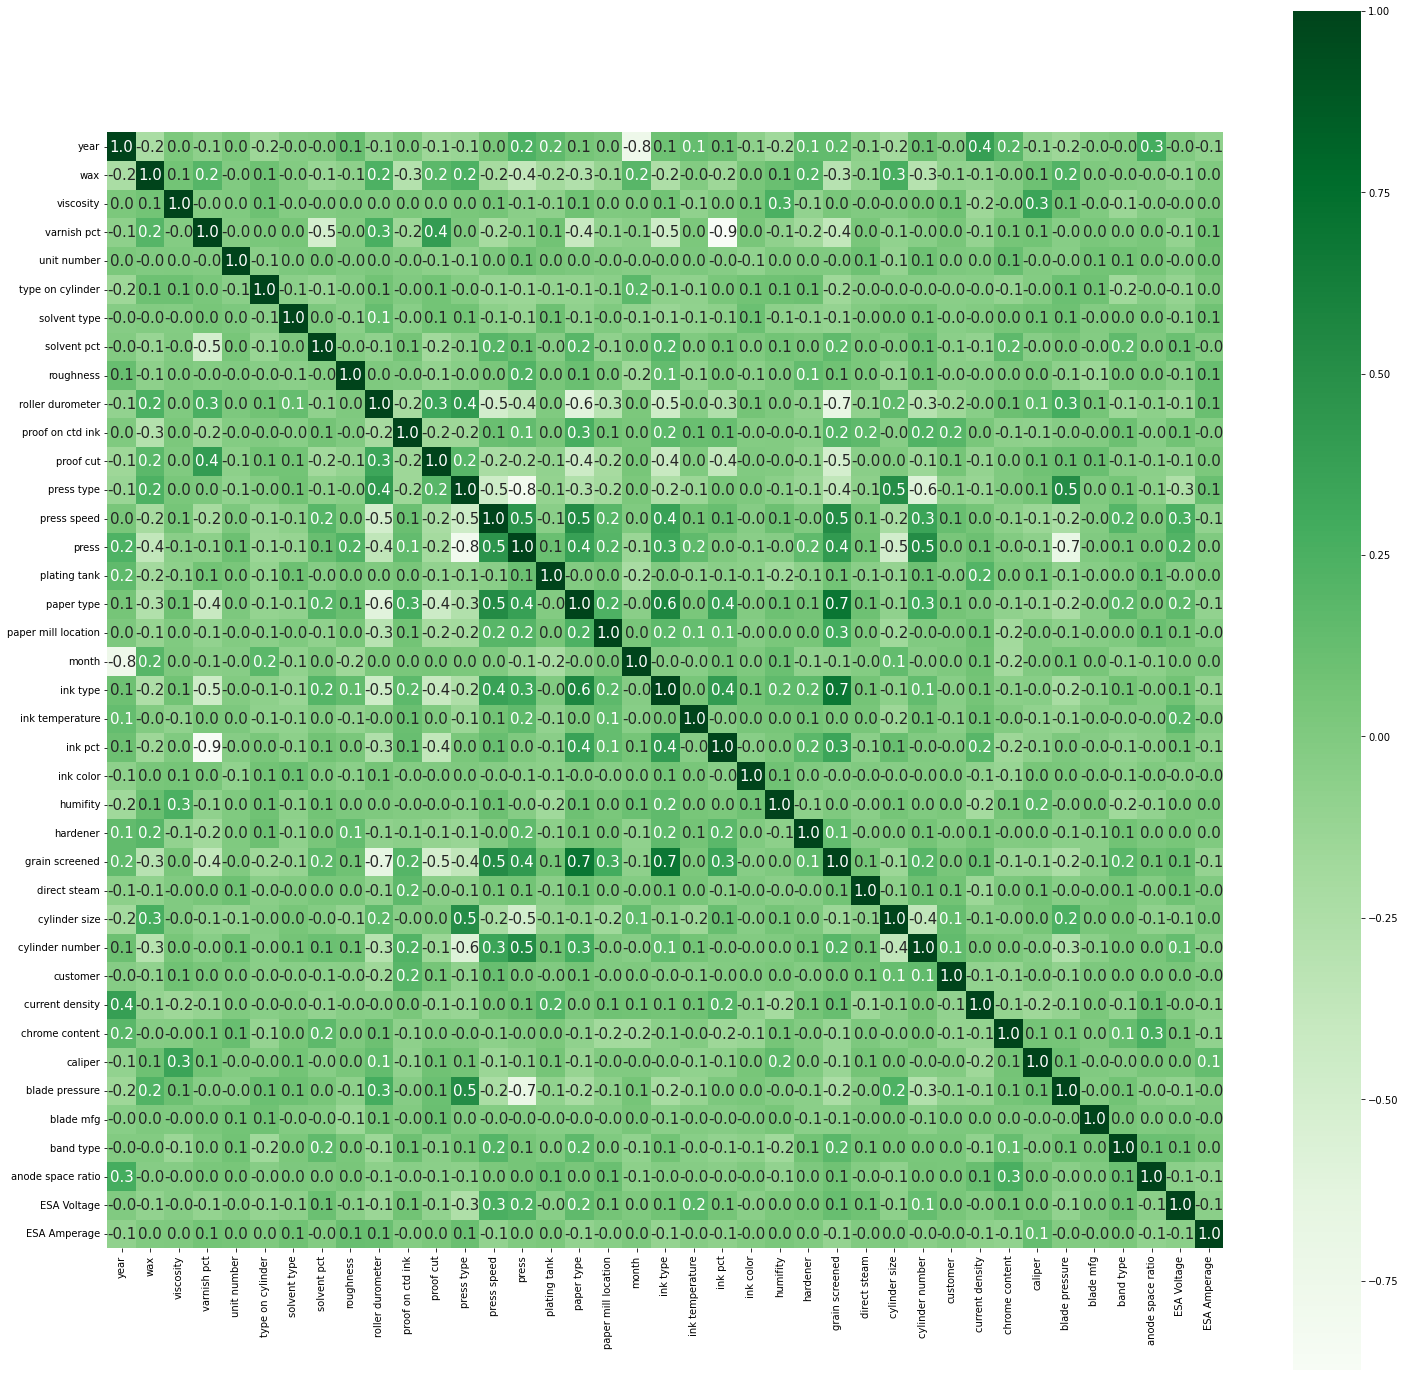

In [391]:
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')